In [1]:
import os
import pandas as pd
import numpy as np
import string

from pprint import pprint

In [2]:
#create the master dataframe

comments_master = pd.read_csv("/Users/chrtjen/Desktop/STB_GTT/Step1Output/Korea.csv", engine='python')
comments_master

,Unnamed: 0,User,User_loc,Date,Discussion,Hashtag,Source_title,Type,User_profile,Source,Product_category,Product,Brand,Country,Source_URL,Translated_Discussion
0,0,안농꼬부기,kr,2021.01.01. 21:31,어제 포포님의 도움으로 스타벅스백 크림으로 겟 할 수 있었어요.\n가방도 받을 겸 ...,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,I was able to get a Starbucksback cream with t...
1,1,후지산3번가기,kr,2021.01.01. 21:35,족발카츠 먹고 싶네요~^-^,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,I want to eat Katsu ~ ^ - ^
2,2,당근덮친토깽이,kr,2021.01.01. 21:38,여기도 맛잇죠 ㅋㅋ전 다른거 먹었지만\n족발카츠가 유명하긴하던,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"I was tasted here. I ate it, but I ate it, but..."
3,3,yunee7,kr,2021.01.01. 21:49,설명 덕에 제가 먹는 느낌이었어요 ㅎㅎ 새해의 첫날 누군가와 함께 하는 식사 좋죠?!^^,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,I was feeling that I was eating in the explana...
4,4,포포리노,kr,2021.01.01. 22:10,글게요... 왜 우리만 남았을까요 ㅠㅜ\n사진 보다가 놀랐어요\n화난 멍멍이 같아 ...,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"I'm not sure why I've been meeting, I was surp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190786,74710,이미소,kr,2021.02.05. 17:50,하루가 저물어가네요,NaN,힘들다고 생각하면 아직 더 할 힘이 있는거다\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
190787,74711,박소희,kr,2021.02.04.,힘들때에는 역시 가족들의 힘이 큰것같네요\n,NaN,힘들때에는 역시 가족들의 힘이 큰것같네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
190788,74712,고민지,kr,2021.02.04. 15:26,올해는 필리핀여행 갈수있을까요?,NaN,힘들때에는 역시 가족들의 힘이 큰것같네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
190789,74717,이명진,kr,2021.01.18.,힘을 내야지 나도 화이팅 여러분도 화이팅\n,NaN,힘을 내야지 나도 화이팅 여러분도 화이팅\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN


In [3]:
#check if any comments are empty after cleaning

comments_master[comments_master['Translated_Discussion'].isnull()]

,Unnamed: 0,User,User_loc,Date,Discussion,Hashtag,Source_title,Type,User_profile,Source,Product_category,Product,Brand,Country,Source_URL,Translated_Discussion
3232,6489,커피향나무,kr,2021.03.15. 18:53,반찬없는 우리집이어서 한그릇으로 해결되는 것 위주로 먹다가몆가지만 해서 밥 먹었어요...,NaN,15일차 뻔한 밥상,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
3233,6490,안농꼬부기,kr,2021.03.15. 19:08,뻔하다니요..ㅜㅜ,NaN,15일차 뻔한 밥상,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
3234,6491,커피향나무,kr,2021.03.15. 20:06,이정도면 뻔한거 아닌가요? ㅋㅋㅋ,NaN,15일차 뻔한 밥상,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
3235,6492,안농꼬부기,kr,2021.03.15. 20:22,그 뻔한것 저도 좀ㅋㅋ,NaN,15일차 뻔한 밥상,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
3236,6493,yunee7,kr,2021.03.15. 20:35,오디가 뻔해요??\n꼬막...저 좋아한다고 어무이도 한가득 사오셔서 무쳐주시는데요 ...,NaN,15일차 뻔한 밥상,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190786,74710,이미소,kr,2021.02.05. 17:50,하루가 저물어가네요,NaN,힘들다고 생각하면 아직 더 할 힘이 있는거다\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
190787,74711,박소희,kr,2021.02.04.,힘들때에는 역시 가족들의 힘이 큰것같네요\n,NaN,힘들때에는 역시 가족들의 힘이 큰것같네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
190788,74712,고민지,kr,2021.02.04. 15:26,올해는 필리핀여행 갈수있을까요?,NaN,힘들때에는 역시 가족들의 힘이 큰것같네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN
190789,74717,이명진,kr,2021.01.18.,힘을 내야지 나도 화이팅 여러분도 화이팅\n,NaN,힘을 내야지 나도 화이팅 여러분도 화이팅\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,NaN


In [4]:
#remove null rows
comments_master.dropna(subset=['Translated_Discussion'],inplace=True)

#reset index
comments_master = comments_master.reset_index(drop=True)

#convert all words in the column into lowercase
comments_master['Translated_Discussion'] = comments_master['Translated_Discussion'].str.lower()

comments_master

,Unnamed: 0,User,User_loc,Date,Discussion,Hashtag,Source_title,Type,User_profile,Source,Product_category,Product,Brand,Country,Source_URL,Translated_Discussion
0,0,안농꼬부기,kr,2021.01.01. 21:31,어제 포포님의 도움으로 스타벅스백 크림으로 겟 할 수 있었어요.\n가방도 받을 겸 ...,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i was able to get a starbucksback cream with t...
1,1,후지산3번가기,kr,2021.01.01. 21:35,족발카츠 먹고 싶네요~^-^,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i want to eat katsu ~ ^ - ^
2,2,당근덮친토깽이,kr,2021.01.01. 21:38,여기도 맛잇죠 ㅋㅋ전 다른거 먹었지만\n족발카츠가 유명하긴하던,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"i was tasted here. i ate it, but i ate it, but..."
3,3,yunee7,kr,2021.01.01. 21:49,설명 덕에 제가 먹는 느낌이었어요 ㅎㅎ 새해의 첫날 누군가와 함께 하는 식사 좋죠?!^^,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i was feeling that i was eating in the explana...
4,4,포포리노,kr,2021.01.01. 22:10,글게요... 왜 우리만 남았을까요 ㅠㅜ\n사진 보다가 놀랐어요\n화난 멍멍이 같아 ...,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"i'm not sure why i've been meeting, i was surp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58533,29055,이진희,kr,2021.10.02. 11:59,이해못할 일들이 생기네요,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,detail travel shangri-lari resort introduction
58534,29056,명지은,kr,2021.10.02. 13:33,위드코로나시대가 다가오네요,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i would like to try the ceikans in shangri-lil...
58535,29057,조미선,kr,2021.10.02. 17:44,세부바다보면서 시원한 맥주한잔하면 좋겠네요,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,philippines cebu family travel resort is popul...
58536,29058,현은아,kr,2021.10.02. 14:37,세부는 비가 올려고해요,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i liked the details of the details. i wanted t...


In [5]:
comments_master.dtypes

Unnamed: 0                 int64
User                      object
User_loc                  object
Date                      object
Discussion                object
Hashtag                  float64
Source_title              object
Type                      object
User_profile              object
Source                    object
Product_category          object
Product                   object
Brand                     object
Country                   object
Source_URL                object
Translated_Discussion     object
dtype: object

In [6]:
#fix common spelling errors
#also can remove URLs here

comments_master['Discussion'] = comments_master['Discussion'].apply(lambda x: x.replace('definately','definitely'))\
                                .apply(lambda x: x.replace('deoderant','deodorant'))\
                                .apply(lambda x: x.replace('liquify','liquefy'))

In [7]:
#write out KWs
#used replace to get correct format for str.contains because I am lazy

keywords= """'beach','beaches','sea','ocean','oceans','river','rivers','garden','gardens','nature reserve','park','parks','market','markets','mall','malls','museum','museums','gallery','galleries','theatre','theatres','restaurant','restaurants','bar','bars','pub','pubs','party','partying','hawker','hawkers','michelin','zoo','zoos','aquarium','aquariums','backpack','backpacked','backpacker','backpacking','hike','hikes','hiked','hiking','hiker','trek','treks','trekked','trekking','walk','walks','dine','dined','dining','festival','festivals','cruise','cruises','spa','spas','exercise','gourmet','cuisine','F1','WTA','Rugby Sevens','One FC','resort','meeting','luxury','pamper','adventure','adventures','adventuring','explore','explored','explorer','exploration','adrenaline','daredevil','sports','wellness','mindfulness','mindful','sustainable','sustainability','self-sustaining','carbon','eco-friendly','eco-friendliness','eco','environmental','environmentally','ethical','ethically','nomad','nomadism','solo','globetrotting','globetrotter','fashion','fashionista','tech geek','tech nerd','gastronomy','dining','business','friendly','crime','scam','scams','scammer','scammers','scammed','cost','cheap','expensive','climate','weather','season','seasons','snow','tourist','touristy','authentic','artificial','family','parents','kid','kids','child','children','dad','mum','father','mother','elderly','friend','friends','plane','fly','flew','flying','flight','train','public transport','travel','singapore','vaccine','going'"""""
           
keywords = keywords.replace(',','|').replace("'","")

keywords


'beach|beaches|sea|ocean|oceans|river|rivers|garden|gardens|nature reserve|park|parks|market|markets|mall|malls|museum|museums|gallery|galleries|theatre|theatres|restaurant|restaurants|bar|bars|pub|pubs|party|partying|hawker|hawkers|michelin|zoo|zoos|aquarium|aquariums|backpack|backpacked|backpacker|backpacking|hike|hikes|hiked|hiking|hiker|trek|treks|trekked|trekking|walk|walks|dine|dined|dining|festival|festivals|cruise|cruises|spa|spas|exercise|gourmet|cuisine|F1|WTA|Rugby Sevens|One FC|resort|meeting|luxury|pamper|adventure|adventures|adventuring|explore|explored|explorer|exploration|adrenaline|daredevil|sports|wellness|mindfulness|mindful|sustainable|sustainability|self-sustaining|carbon|eco-friendly|eco-friendliness|eco|environmental|environmentally|ethical|ethically|nomad|nomadism|solo|globetrotting|globetrotter|fashion|fashionista|tech geek|tech nerd|gastronomy|dining|business|friendly|crime|scam|scams|scammer|scammers|scammed|cost|cheap|expensive|climate|weather|season|seasons

In [8]:
comments_master = comments_master[comments_master['Translated_Discussion'].str.contains(keywords, na=False)].reset_index(drop=True)

comments_master

,Unnamed: 0,User,User_loc,Date,Discussion,Hashtag,Source_title,Type,User_profile,Source,Product_category,Product,Brand,Country,Source_URL,Translated_Discussion
0,0,안농꼬부기,kr,2021.01.01. 21:31,어제 포포님의 도움으로 스타벅스백 크림으로 겟 할 수 있었어요.\n가방도 받을 겸 ...,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i was able to get a starbucksback cream with t...
1,4,포포리노,kr,2021.01.01. 22:10,글게요... 왜 우리만 남았을까요 ㅠㅜ\n사진 보다가 놀랐어요\n화난 멍멍이 같아 ...,NaN,0101 디너-) 경양카츠,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"i'm not sure why i've been meeting, i was surp..."
2,23,안농꼬부기,kr,2021.01.01. 16:29,"이벤트 기간은 한달이지만,\n조기 종료 가능성도 있고\n이벤트가 알려지면 구매못할 ...",NaN,0101 이마트24,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,"the event period is a month, but it is an earl..."
3,41,안농꼬부기,kr,2021.01.04. 00:52,150개이상 TOP5에 들기 참 어려워요..\n이번에는 198개인가 썼던 것 같아요...,NaN,0103 게시글 이벤트-),forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,it's hard to get to the top5 of 150. this time...
4,48,안농꼬부기,kr,2021.01.03. 21:06,댓글 400개정도 헤아리지 않아요^^;\n3주면 400개는 거뜬히 넘으니까요^^;\...,NaN,0103 댓글 이벤트-),forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i do not have to count the 400 comments ^^; th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,29053,이정진,kr,2021.10.02. 11:13,또하루의 시작입니다 힘든요즘 건강 잃지 않도록 해요,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,cebu went to shangri-lara jetty trip to family...
9886,29054,이명진,kr,2021.10.02. 11:27,오늘의 행복은 모두 당신에게로,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,i would like to enjoy a hard dip in the detail...
9887,29055,이진희,kr,2021.10.02. 11:59,이해못할 일들이 생기네요,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,detail travel shangri-lari resort introduction
9888,29057,조미선,kr,2021.10.02. 17:44,세부바다보면서 시원한 맥주한잔하면 좋겠네요,NaN,세부여행 다시한번 가보고싶네요\n,forum,https://cafe.naver.com/CafeMemberNetworkView.n...,naver,travel,tourism,stb,kr,https://cafe.naver.com/ArticleRead.nhn?clubid=...,philippines cebu family travel resort is popul...


## EDA

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams
import spacy
from spacy.lang.en import English

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrtjen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/chrtjen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
string.punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¬†�'

In [12]:
#have to add in words without apostrophe eg dont, im, ive
#add words based on LDA iterations
#remove informal words
#remove numbers
#remove Korean characters that frequently appear
#aloha is mentioned very frequently, can remove

stop_words = set(stopwords.words('english'))

stop_words.add('cant')
stop_words.add('couldnt')
stop_words.add('couldve')
stop_words.add('im')
stop_words.add('ive')
stop_words.add('dont')
stop_words.add('didnt')
stop_words.add('doesnt')
stop_words.add('hes')
stop_words.add('shes')
stop_words.add('shouldnt')
stop_words.add('shouldve')
stop_words.add('its')
stop_words.add('thats')
stop_words.add('weve')
stop_words.add('whats')
stop_words.add('wont')
stop_words.add('wouldnt')
stop_words.add('wouldve')
stop_words.add('youre')

stop_words.add('absolutely')
stop_words.add('actually')
stop_words.add('already')
stop_words.add('always')
stop_words.add('also')
stop_words.add('although')
stop_words.add('always')
stop_words.add('anyone')
stop_words.add('around')
stop_words.add('ask')
stop_words.add('back')
stop_words.add('etc')
stop_words.add('even')
stop_words.add('first')
stop_words.add('go')
stop_words.add('get')
stop_words.add('give')
stop_words.add('especially')
stop_words.add('hope')
stop_words.add('however')
stop_words.add('http')
stop_words.add('https')
stop_words.add('know')
stop_words.add('like')
stop_words.add('make')
stop_words.add('may')
stop_words.add('maybe')
stop_words.add('mean')
stop_words.add('might')
stop_words.add('mine')
stop_words.add('one')
stop_words.add('probably')
stop_words.add('really')
stop_words.add('say')
stop_words.add('seem')
stop_words.add('since')
stop_words.add('sometimes')
stop_words.add('still')
stop_words.add('stuff')
stop_words.add('take')
stop_words.add('thank')
stop_words.add('thing')
stop_words.add('think')
stop_words.add('though')
stop_words.add('u')
stop_words.add('us')
stop_words.add('use')
stop_words.add('without')
stop_words.add('would')
stop_words.add('x')
stop_words.add('yeah')
stop_words.add('yet')

stop_words.add('alright')
stop_words.add('haha')
stop_words.add('hehe')
stop_words.add('hey')
stop_words.add('hi')
stop_words.add('lol')
stop_words.add('ok')
stop_words.add('okay')
stop_words.add('omg')
stop_words.add('yay')
stop_words.add('yep')

stop_words.add('ㅋ')
stop_words.add('ㅠ')
stop_words.add('ㅎ')
stop_words.add('엔')
stop_words.add('ㅜ')
stop_words.add('ㅇ')
stop_words.add('샀')
stop_words.add('키')
stop_words.add('쫘')
stop_words.add('★')
stop_words.add('▼')
stop_words.add('↓')
stop_words.add('오')
stop_words.add('shi')
stop_words.add('합니다')
stop_words.add('cha')
stop_words.add('ha')
stop_words.add('aloha')
stop_words.add('answer')
stop_words.add('cafenavercom')
stop_words.add('hai')
stop_words.add('q')
stop_words.add('faithful')
stop_words.add('mistler')
stop_words.add('hawaiiphoto')
stop_words.add('747888')

stop_words.add('1')
stop_words.add('2')
stop_words.add('3')
stop_words.add('4')
stop_words.add('5')
stop_words.add('6')
stop_words.add('7')
stop_words.add('8')
stop_words.add('9')
stop_words.add('0')

pprint(stop_words)

{'0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '747888',
 '8',
 '9',
 'a',
 'about',
 'above',
 'absolutely',
 'actually',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'aloha',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'am',
 'an',
 'and',
 'answer',
 'any',
 'anyone',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'ask',
 'at',
 'back',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'cafenavercom',
 'can',
 'cant',
 'cha',
 'couldn',
 "couldn't",
 'couldnt',
 'couldve',
 'd',
 'did',
 'didn',
 "didn't",
 'didnt',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doesnt',
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'especially',
 'etc',
 'even',
 'faithful',
 'few',
 'first',
 'for',
 'from',
 'further',
 'get',
 'give',
 'go',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'haha',
 'hai',
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'hawaiiphoto',
 'he',
 'hehe',
 'her',
 'here',
 'hers'

In [13]:
#removed slash in original string.punctuation string as it resulted in conjoined words.
#Wrote additional .replace function to replace slashes with a space to fix this.
#Ditto for dash.

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation.replace('/','').replace('-',''))).replace('/',' ').replace('-',' ').replace('\n', ' ').lower()

In [14]:
# example
text = """O.P.
I bought some to cook with, but didn't. (It seemed like a good idea at the time).
Is this the same stuff they say to put in your hair to condition it etc?
It looks to be solid white goo, like hair treatment creams. It's not runny like olive oil
What else can I do with it too? Or is this one just for cooking with. (it says ideal for baking/cooking on the label)
"""
remove_punctuation(text)

'op i bought some to cook with but didnt it seemed like a good idea at the time is this the same stuff they say to put in your hair to condition it etc it looks to be solid white goo like hair treatment creams its not runny like olive oil what else can i do with it too or is this one just for cooking with it says ideal for baking cooking on the label '

In [15]:
def remove_stopwords(text, stop_words=stopwords):
    return [word for word in text.split(' ') if word not in stop_words]

In [16]:
#testing remove stop words function

sentence = """op i bought some to cook with but didnt it seemed like a good idea at the time \
is this the same stuff they say to put in your hair to condition it etc \
it looks to be solid white goo like hair treatment creams its not runny like olive oil \
what else can i do with it too or is this one just for cooking with it says ideal for baking cooking on the label\
"""

' '.join([str(i) for i in remove_stopwords(sentence, stop_words)])

'op bought cook seemed good idea time put hair condition looks solid white goo hair treatment creams runny olive oil else cooking says ideal baking cooking label'

In [17]:
lemma = WordNetLemmatizer()

def lemmatize_text(word):
    return lemma.lemmatize(word,'v')

In [18]:
#testing lemmatize function

sentence = """op bought cook didnt seemed like good idea time stuff say put hair condition etc looks solid white goo \
like hair treatment creams runny like olive oil else one cooking says ideal baking cooking label travels"""

lemmatized = ' '.join([lemmatize_text(word) for word in sentence.split()])
print(lemmatized)

op buy cook didnt seem like good idea time stuff say put hair condition etc look solid white goo like hair treatment cream runny like olive oil else one cook say ideal bake cook label travel


In [19]:
#create new column in comments_master, apply remove punctuation and stop words functions and lemmatize
#after lemmatizing, have to remove stop words again as some root words may be stop words. This is still faster than lemmatizing first

comments_master['Discussion_cleaned'] = comments_master['Translated_Discussion']\
                    .apply(lambda string: remove_stopwords(remove_punctuation(string), stop_words))\
                    .str.join(' ')\
                    .apply(lambda string: [lemmatize_text(word) for word in str(string).replace(',','').split()])\
                    .str.join(' ')\
                    .apply(lambda string: [str(i) for i in remove_stopwords(string, stop_words)])

comments_master['Discussion_cleaned']

0       [able, starbucksback, cream, medium, popo, yes...
1                             [sure, meet, surprise, see]
2       [event, period, month, early, exit, event, pos...
3       [hard, top5, 150, time, aware, write, 198, pos...
4       [count, 400, comment, three, weeks, 400, evide...
                              ...                        
9885    [cebu, shangri, lara, jetty, trip, family, tri...
9886                   [enjoy, hard, dip, detail, resort]
9887    [detail, travel, shangri, lari, resort, introd...
9888    [philippines, cebu, family, travel, resort, po...
9889    [cebu, travel, luxury, cebu, tour, tour, oslob...
Name: Discussion_cleaned, Length: 9890, dtype: object

#### Create CSV of cleaned dataset

In [20]:
#Must create copy of dataframe and make edits to that, so that it does not affect original dataframe

dataframe_for_csv = comments_master.copy(deep=True)

dataframe_for_csv['Discussion_cleaned'] = dataframe_for_csv['Discussion_cleaned'].str.join(' ')

dataframe_for_csv.to_csv("/Users/chrtjen/Desktop/STB_GTT/STB_GTT_Categorisation/Korea.csv",index=False)

## n-grams

In [21]:
#combine all comments into one list of words for n-grams analysis
for_ngrams = []

for i in range(len(comments_master['Discussion_cleaned'])):
    for x in comments_master['Discussion_cleaned'][i]:
        for_ngrams.append(x)

for_ngrams

['able',
 'starbucksback',
 'cream',
 'medium',
 'popo',
 'yesterday',
 'eat',
 'bag',
 'originally',
 'place',
 'wish',
 'balkzz',
 'unusual',
 'menu',
 'menu',
 'wrap',
 'kimchi',
 'eat',
 'worry',
 'fine',
 'fine',
 'bakjack',
 'note',
 'roger',
 'want',
 'put',
 'fry',
 'try',
 'fascinate',
 'katsutsu',
 'balkz',
 'instead',
 'good',
 'idea',
 'price',
 'katsu',
 'katsu',
 'curry',
 'ㅎㅎ',
 'maine',
 'side',
 'dish',
 'shrimp',
 'raw',
 'feel',
 'feel',
 'pork',
 'cutlet',
 'close',
 'feel',
 'eat',
 'eat',
 'red',
 'pepper',
 'time',
 'long',
 'time',
 'fun',
 'food',
 'come',
 'food',
 'come',
 'food',
 'people',
 'people',
 'last',
 'time',
 'ㅋㅋㅋ',
 '507',
 '61',
 'sure',
 'meet',
 'surprise',
 'see',
 'event',
 'period',
 'month',
 'early',
 'exit',
 'event',
 'possible',
 'buy',
 'way',
 'public',
 'transport',
 'come',
 'way',
 'fire',
 'cold',
 'course',
 'picture',
 'integrate',
 'bar',
 'code',
 'new',
 'world',
 'hard',
 'top5',
 '150',
 'time',
 'aware',
 'write',
 '198',

In [22]:
#cleaned_comments = comments_master['Discussion_cleaned'].str.join(' ').tolist()
main_corpus = ' '.join(for_ngrams)

main_corpus

'able starbucksback cream medium popo yesterday eat bag originally place wish balkzz unusual menu menu wrap kimchi eat worry fine fine bakjack note roger want put fry try fascinate katsutsu balkz instead good idea price katsu katsu curry ㅎㅎ maine side dish shrimp raw feel feel pork cutlet close feel eat eat red pepper time long time fun food come food come food people people last time ㅋㅋㅋ 507 61 sure meet surprise see event period month early exit event possible buy way public transport come way fire cold course picture integrate bar code new world hard top5 150 time aware write 198 post write 67 per day honest cafe osaka japan corona trip lose count 400 comment three weeks 400 evidence fall road fall osaka fall café osho corona period travel travel saw chapter start food buy 40 discount mi county meat buy 11000 lot meat eat time sorrated woman eat snowy worry worry buy wash mask buy product product womanss buy tube buy mask pack lot time period time yesterday bangkok run today crowd r

In [23]:
from collections import Counter

word_freq = Counter(for_ngrams)
common_words = word_freq.most_common(20)

common_words

[('good', 2866),
 ('travel', 2861),
 ('time', 2389),
 ('want', 1845),
 ('day', 1751),
 ('lot', 1621),
 ('trip', 1563),
 ('detail', 1416),
 ('tour', 1332),
 ('see', 1329),
 ('weather', 1324),
 ('sea', 1182),
 ('place', 1095),
 ('please', 1047),
 ('park', 1009),
 ('best', 957),
 ('today', 854),
 ('year', 822),
 ('come', 812),
 ('eat', 793)]

In [24]:
common_words.sort(key=lambda x: x[1], reverse=True)

words = list(zip(*common_words))[0]
score = list(zip(*common_words))[1]
y_pos = np.arange(len(words))

commonwords = list(words)

commonwords

['good',
 'travel',
 'time',
 'want',
 'day',
 'lot',
 'trip',
 'detail',
 'tour',
 'see',
 'weather',
 'sea',
 'place',
 'please',
 'park',
 'best',
 'today',
 'year',
 'come',
 'eat']

In [25]:
unigrams = ngrams(for_ngrams, 1)

unigram_freq = Counter(unigrams)

unigram_freq.most_common(100)

[(('good',), 2866),
 (('travel',), 2861),
 (('time',), 2389),
 (('want',), 1845),
 (('day',), 1751),
 (('lot',), 1621),
 (('trip',), 1563),
 (('detail',), 1416),
 (('tour',), 1332),
 (('see',), 1329),
 (('weather',), 1324),
 (('sea',), 1182),
 (('place',), 1095),
 (('please',), 1047),
 (('park',), 1009),
 (('best',), 957),
 (('today',), 854),
 (('year',), 822),
 (('come',), 812),
 (('eat',), 793),
 (('corona',), 776),
 (('hawaii',), 743),
 (('enjoy',), 738),
 (('look',), 735),
 (('cafe',), 644),
 (('island',), 616),
 (('able',), 603),
 (('kim',), 592),
 (('people',), 562),
 (('resort',), 549),
 (('free',), 546),
 (('family',), 541),
 (('days',), 522),
 (('vaccine',), 512),
 (('cebu',), 512),
 (('korea',), 508),
 (('schedule',), 505),
 (('beautiful',), 501),
 (('afraid',), 489),
 (('meet',), 484),
 (('start',), 473),
 (('san',), 467),
 (('new',), 460),
 (('course',), 458),
 (('beach',), 450),
 (('happy',), 448),
 (('ill',), 446),
 (('information',), 445),
 (('hot',), 442),
 (('philippin

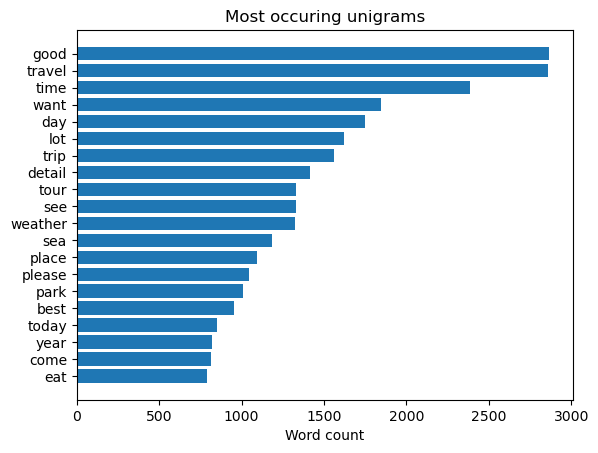

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, score, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(words)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word count')
ax.set_title('Most occuring unigrams')

plt.show()

## Create word cloud

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

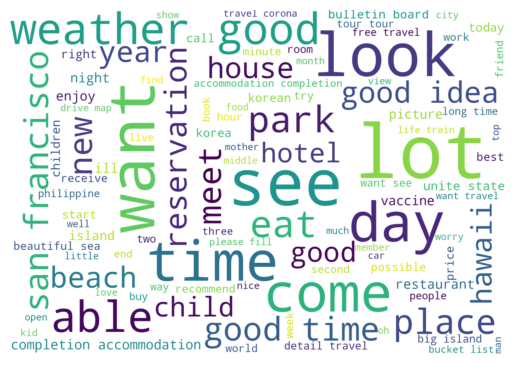

In [28]:
wordcloud = WordCloud(width=2000, height=1400, max_words=100, max_font_size=300, background_color="white", relative_scaling=.8).generate(main_corpus)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
bigrams = ngrams(for_ngrams, 2)

bigram_freq = Counter(bigrams)

common_bigrams = bigram_freq.most_common(20)

common_bigrams

[(('weather', 'good'), 502),
 (('san', 'francisco'), 359),
 (('good', 'time'), 356),
 (('good', 'idea'), 314),
 (('unite', 'state'), 251),
 (('bulletin', 'board'), 229),
 (('beautiful', 'sea'), 212),
 (('want', 'see'), 199),
 (('detail', 'travel'), 197),
 (('big', 'island'), 196),
 (('tour', 'tour'), 192),
 (('completion', 'accommodation'), 187),
 (('long', 'time'), 181),
 (('free', 'travel'), 178),
 (('accommodation', 'completion'), 175),
 (('bucket', 'list'), 169),
 (('please', 'fill'), 162),
 (('life', 'train'), 159),
 (('travel', 'corona'), 158),
 (('drive', 'map'), 151)]

In [30]:
common_bigrams.sort(key=lambda x: x[1], reverse=True)

bigrams = list(zip(*common_bigrams))[0]
score2 = list(zip(*common_bigrams))[1]
y_pos2 = np.arange(len(words))

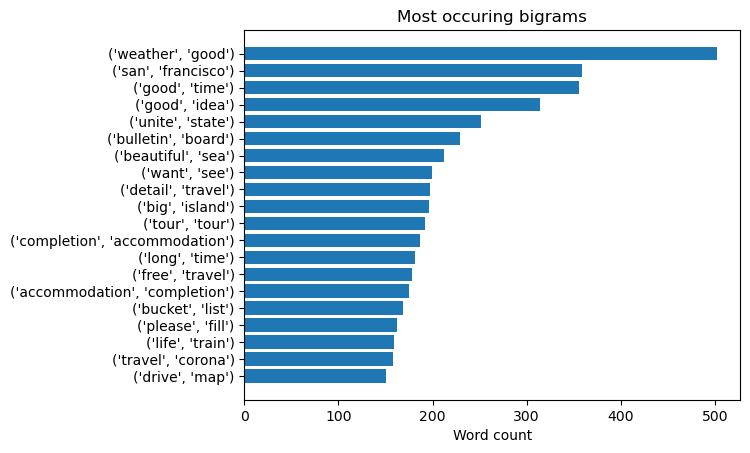

In [31]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, score2, align='center')
ax.set_yticks(y_pos2)
ax.set_yticklabels(bigrams)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word count')
ax.set_title('Most occuring bigrams')

plt.show()

In [32]:
trigrams = ngrams(for_ngrams, 3)

trigram_freq = Counter(trigrams)

common_trigrams = trigram_freq.most_common(20)

common_trigrams

[(('completion', 'accommodation', 'completion'), 171),
 (('wish', 'travel', 'corona'), 144),
 (('forever', 'join', 'cafe'), 138),
 (('join', 'cafe', 'door'), 138),
 (('cafe', 'door', 'please'), 138),
 (('door', 'please', 'fill'), 138),
 (('please', 'fill', 'maximum'), 138),
 (('fill', 'maximum', 'please'), 138),
 (('maximum', 'please', 'bulletin'), 138),
 (('please', 'bulletin', 'board'), 138),
 (('day', 'life', 'train'), 127),
 (('start', 'day', 'life'), 126),
 (('life', 'train', 'today'), 126),
 (('board', 'prepare', 'trip'), 121),
 (('seoul', 'gyeonggi', 'busan'), 118),
 (('relax', 'day', 'wide'), 112),
 (('day', 'wide', 'sea'), 112),
 (('wide', 'sea', 'flow'), 112),
 (('sea', 'flow', 'river'), 112),
 (('la', 'san', 'francisco'), 111)]

In [33]:
common_trigrams.sort(key=lambda x: x[1], reverse=True)

trigrams = list(zip(*common_trigrams))[0]
score3 = list(zip(*common_trigrams))[1]
y_pos3 = np.arange(len(words))

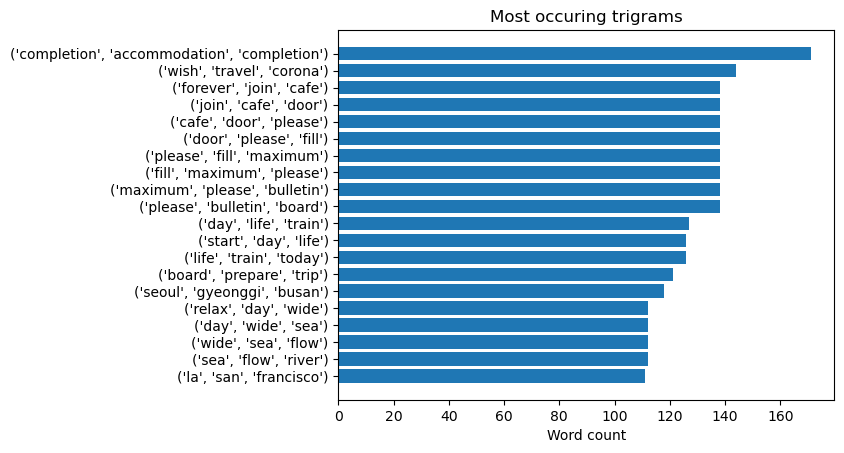

In [34]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, score3, align='center')
ax.set_yticks(y_pos3)
ax.set_yticklabels(trigrams)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word count')
ax.set_title('Most occuring trigrams')

plt.show()